### Notice: 
This is the notebook to share my data processing process with team containes partial imtermeidate results. Data is not open to public and cannot be shared.  

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from IPython.display import HTML

### Data Inital Processing

In [2]:
ads = pd.read_csv('merged.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
ads.head()

,Ad Types,Ad locations,Ad sources,Advertiser verticals,DFP Ad Units,Creative sizes,Days,Ad requests,Matched requests,CPC ($),Estimated revenue ($),Ad impressions,Ad eCPM ($)
0,(Unmatched ad requests),Above the fold,(Unmatched ad requests),(unknown),(No inventory unit),(Unmatched ad requests),10/1/17,"2,541",0,0.0,0.0,0,0.0
1,(Unmatched ad requests),Above the fold,(Unmatched ad requests),(unknown),(No inventory unit),(Unmatched ad requests),10/2/17,685,0,0.0,0.0,0,0.0
2,(Unmatched ad requests),Above the fold,(Unmatched ad requests),(unknown),(No inventory unit),(Unmatched ad requests),10/3/17,757,0,0.0,0.0,0,0.0
3,(Unmatched ad requests),Above the fold,(Unmatched ad requests),(unknown),(No inventory unit),(Unmatched ad requests),10/4/17,310,0,0.0,0.0,0,0.0
4,(Unmatched ad requests),Above the fold,(Unmatched ad requests),(unknown),(No inventory unit),(Unmatched ad requests),10/5/17,"2,024",0,0.0,0.0,0,0.0


Convert Date format:

In [4]:
def convert_date(df):
    '''
    input: df -- dataframe
    output: datetime format column named 'Days_'
    '''
    df['Days_'] = df['Days'].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))
    return df['Days_']

In [ ]:
ads['Days'] = convert_date(ads)

Convert dtypes into numeric (for some):

In [134]:
ads.dtypes

Ad Types                         object
Ad locations                     object
Ad sources                       object
Advertiser verticals             object
Creative sizes                   object
Ad requests                       int64
Matched requests                  int64
CPC ($)                         float64
Estimated revenue ($)           float64
Ad impressions                    int64
Ad eCPM ($)                     float64
Days_                    datetime64[ns]
AdU_mtch/no                      object
AdU_chanell                      object
AdU_language                     object
AdU_seg                          object
AdU_where                        object
dtype: object

In [53]:
def convet_str2int(df,v):
    '''
    input: 
        df -- dataframe 
        v -- 'variable names'
    output: a numerical column, replace the original 
    '''
    return df[v].apply(lambda x: int(str(x).replace(',','')))     

In [54]:
ads['Matched requests'] = convet_str2int(ads,'Matched requests')
ads['Ad requests'] = convet_str2int(ads,'Ad requests')
ads['Ad impressions'] = convet_str2int(ads,'Ad impressions')

Deal with 'DFP Ad Units':

In [64]:
AdU_cols = ads['DFP Ad Units'].str.split(' » ', expand=True).rename(columns = {0:'AdU_mtch/no', 1:'AdU_chanell', 2:'AdU_language', 3:'AdU_seg',4:'AdU_where'})
ads = pd.concat([ads, AdU_cols], axis=1)
del ads['DFP Ad Units']

In [132]:
ads.tail(3)

,Ad Types,Ad locations,Ad sources,Advertiser verticals,Creative sizes,Ad requests,Matched requests,CPC ($),Estimated revenue ($),Ad impressions,Ad eCPM ($),Days_,AdU_mtch/no,AdU_chanell,AdU_language,AdU_seg,AdU_where
26964766,Video,Unknown,Open Auction,Travel & Tourism,300x250,15,15,0.0,0.0,3,0.75,2018-05-14,6556,tasty.amphtml,en,recipe,promo2-bp
26964767,Video,Unknown,Open Auction,Travel & Tourism,300x250,4,4,0.0,0.0,1,0.76,2018-05-15,6556,tasty.amphtml,en,recipe,promo2-bp
26964768,Video,Unknown,Open Auction,Travel & Tourism,300x250,11,11,0.0,0.0,1,0.76,2018-05-16,6556,tasty.amphtml,en,recipe,promo2-bp


In [122]:
ads['AdU_where'].value_counts()

promo-inline1            2621099
promo-inline2            2315114
promo-inline3            2122393
promo-inline4            1906131
promo1-bp                1707813
promo5-bp                1665125
promo-inline5            1504236
bigstory-bp              1494231
promo-bottom1            1421975
promo4-bp                 701412
thumb-sidebar3            656788
promo2-bp                 649707
thumb-sidebar2            629453
promo-bottom2             624457
quiz_ad                   483794
awareness                 403869
thumb-sidebar1            348404
promo1                    333573
promo-infinite            288517
promo-bottom3             276854
promo-inline-infinite     249782
promo3                    223902
promo1-wide               216690
promo-wide-infinite       214018
bigstory                  195396
promo-inline6             183458
promo3-bp                 181270
promo5                    172390
promo2-wide               150984
promo-inline7             143276
          

Slice tasty data: shape = (91811, 17)

In [79]:
ads_tasty = ads[ads['AdU_chanell'].str.contains("tasty")==True]

In [82]:
ads_tasty.to_csv('ads_tasty')

### Some explorations

#### Variable Facts:

Ad sources: 

    Open Auction               26126682 
    (Unmatched ad requests)      838087
Ad locations: 

    Unknown           17420188
    Below the fold     5384884
    Above the fold     4159697
    
Creative sizes:

    300x250                    23166780
    300x600                     1108924
    970x90                      1072721
    (Unmatched ad requests)      838087
    970x250                      608623
    300x300                       63040
    320x50                        46316
    Native                        28589
    Video/Overlay                 27978
    300x60                         2152
    ...
 
Ad Types:

    Rich media                 9306481
    Image                      7095585
    Animated image             4465050
    Text                       3273582
    Auto display               1337865
    (Unmatched ad requests)     838086
    Video                       334683
    Flash                       312402
    Audio                         1034
    kUnmatched ad requests)          1

Advertiser verticals:

    Apparel                             1720699
    Business & Industrial               1545220
    Travel & Tourism                    1475986
    Finance                             1448224
    Home & Garden                       1440095
    Internet & Telecom                  1419802
    Arts & Entertainment                1413595
    Jobs & Education                    1404632
    Beauty & Personal Care              1338240
    Hobbies, Games & Leisure            1311891
    Computers & Consumer Electronics    1294833
    (unknown)                           1288819
    Autos & Vehicles                    1271435
    Real Estate                         1180275
    Health                              1155798
    Food & Groceries                    1141705
    Sports & Fitness                    1115239
    Family & Community                  1111387
    Dining & Nightlife                   961319
    Occasions & Gifts                    890264
    Law & Government                     666377
    News, Books & Publications           368757
    Mobile Apps                             177

In [105]:
ads_mtch = ads[ads['Matched requests']!= 0]

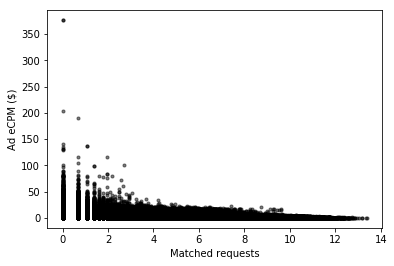

In [86]:
colors = (0,0,0)
area = np.pi*3
plt.scatter(np.log(ads_mtch['Matched requests']), ads_mtch['Ad eCPM ($)'], s=area, c=colors, alpha=0.5)
plt.title('')
plt.xlabel('Matched requests')
plt.ylabel('Ad eCPM ($)')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


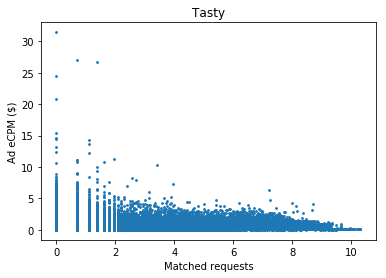

In [96]:
area = np.pi
plt.scatter(np.log(ads_tasty['Matched requests']), ads_tasty['Ad eCPM ($)'], s=area,  alpha=1)
plt.title('Tasty')
plt.xlabel('Matched requests')
plt.ylabel('Ad eCPM ($)')
plt.show()

look at seasonality of Ad eCPM:

In [115]:
grouped = ads_mtch.groupby(['Days_'])

In [116]:
ave_eCPM = grouped.agg({'Ad eCPM ($)' : np.mean}).reset_index()

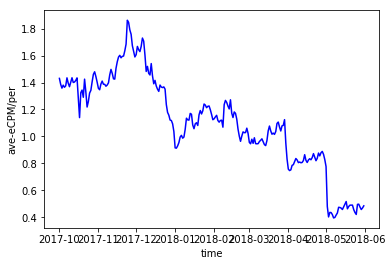

In [121]:
fig, ax = plt.subplots()
ax.plot_date(ave_eCPM['Days_'], ave_eCPM['Ad eCPM ($)'], 'b-')
plt.xlabel('time')
plt.ylabel('ave-eCPM/per')
plt.show()

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(adx_march_matched_addcols['Ad sources'])
adx_march_matched_addcols['Ad_src'] = le.transform(adx_march_matched_addcols['Ad sources'])